In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [4]:
data = pd.read_csv('AIML Dataset.csv')

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
data["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [9]:
data["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [10]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
data.shape[0]

1048575

In [12]:
print(round((data["isFraud"].value_counts()[1] / data.shape[0]) * 100, 2))

0.11


<module 'matplotlib.pyplot' from 'c:\\Users\\jahan\\.vscode\\Python\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

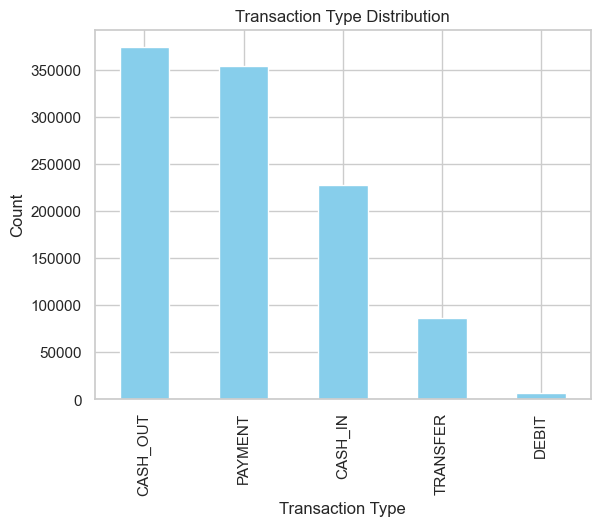

In [13]:
data["type"].value_counts().plot(kind="bar",title = "Transaction Type Distribution", xlabel = "Transaction Type", ylabel = "Count",color = "skyblue")
plt

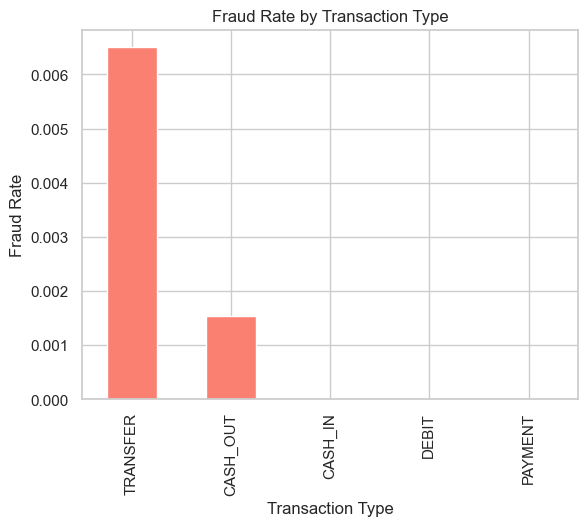

In [14]:
fraud_by_type = data.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Transaction Type", xlabel="Transaction Type", ylabel="Fraud Rate", color="salmon")
plt.show()

In [15]:
data["amount"].describe().astype(int)

count     1048575
mean       158666
std        264940
min             0
25%         12149
50%         76343
75%        213761
max      10000000
Name: amount, dtype: int64

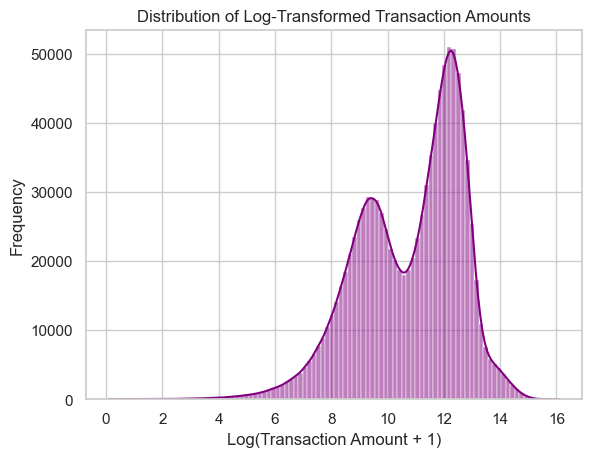

In [16]:
sns.histplot(np.log1p(data["amount"]), bins=100, kde=True, color="purple")
plt.title("Distribution of Log-Transformed Transaction Amounts")
plt.xlabel("Log(Transaction Amount + 1)")
plt.ylabel("Frequency")
plt.show()

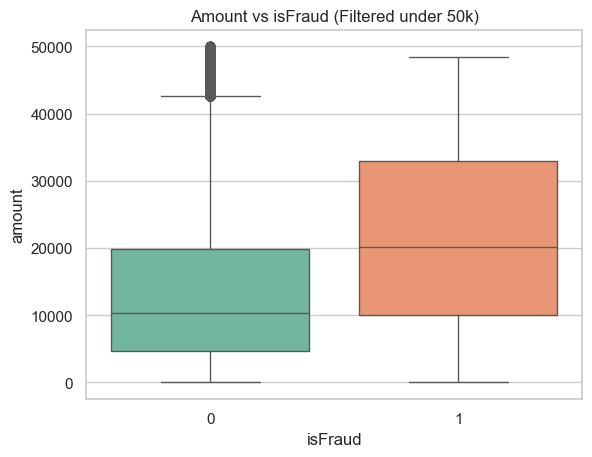

In [17]:
sns.boxplot(data=data[data["amount"] < 50000], x="isFraud", y="amount", palette="Set2")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [18]:
data["BalancedDiffOrig"] = data["oldbalanceOrg"] - data["newbalanceOrig"]
data["BalancedDiffDest"] = data["oldbalanceDest"] - data["newbalanceDest"]

In [19]:
print((data["BalancedDiffOrig"] < 0).sum())
print((data["BalancedDiffDest"] < 0).sum())

221805
465925


In [20]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalancedDiffOrig,BalancedDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


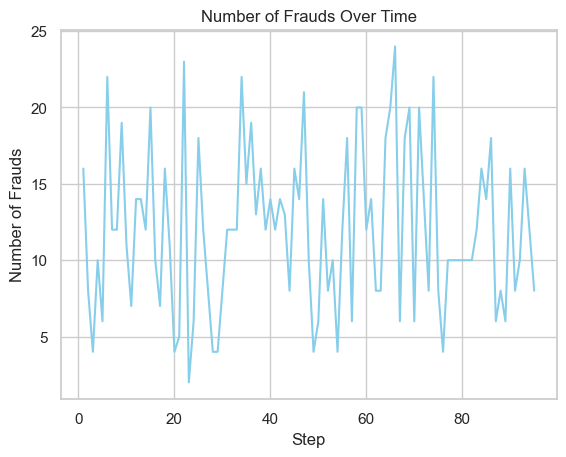

In [21]:
frauds_per_step = data[data["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, color="skyblue",label = "Frauds per Step")
plt.title("Number of Frauds Over Time")
plt.xlabel("Step")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.show()

In [22]:
data.drop(columns = "step", inplace = True)

In [23]:
data.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalancedDiffOrig,BalancedDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [24]:
top_senders = data["nameOrig"].value_counts().head(10)
top_receivers = data["nameDest"].value_counts().head(10)

In [25]:
top_senders

nameOrig
C821145334     2
C693814021     2
C178467166     2
C309111136     2
C2097341930    2
C894095661     2
C1041466144    2
C1322843847    2
C77405061      2
C1561789477    2
Name: count, dtype: int64

In [26]:
top_receivers

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
Name: count, dtype: int64

In [27]:
fraud_users = data[data["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [28]:
fraud_types= data[data["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types["type"].value_counts()

type
CASH_OUT    373641
TRANSFER     86753
Name: count, dtype: int64

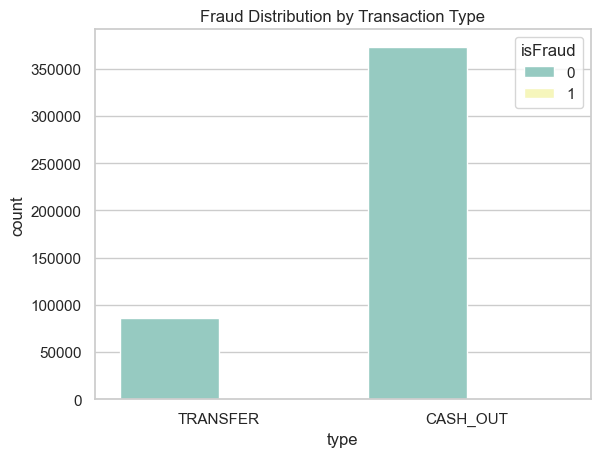

In [29]:
sns.countplot(data=fraud_types, x="type", hue="isFraud", palette="Set3")
plt.title("Fraud Distribution by Transaction Type")
plt.show()

In [30]:
corr = data[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [31]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


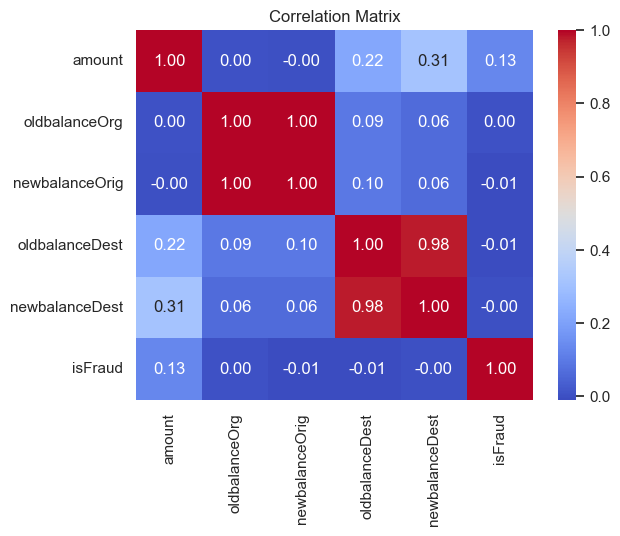

In [32]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix") 
plt.show()

In [33]:
zero_after_transfer = data[(data["oldbalanceOrg"] > 0) & (data["newbalanceOrig"] == 0) & (data["type"].isin(["Transfer" , "CASH_OUT"]))]

In [34]:
len(zero_after_transfer)

155237

In [39]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalancedDiffOrig,BalancedDiffDest
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,181.00,21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,15325.00,-46430.44
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0,26845.41,286384.84
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0,1942.02,6146.82
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0,20411.53,25742.00


In [40]:
data["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [43]:
data_model = data.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [44]:
data_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,BalancedDiffOrig,BalancedDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [45]:
categorical = ["type"]
numerical = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [46]:
y = data_model["isFraud"]
X = data_model.drop("isFraud", axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop= "first"), categorical)
    ],
    remainder = "drop"
)

In [49]:
pipeline  = Pipeline([
    ("prep" , preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter = 1000))
])

In [50]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [52]:
y_pred = pipeline.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred) ) 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    314230
           1       0.02      0.97      0.03       343

    accuracy                           0.94    314573
   macro avg       0.51      0.95      0.50    314573
weighted avg       1.00      0.94      0.97    314573



In [55]:
confusion_matrix(y_test, y_pred)

array([[295018,  19212],
       [    11,    332]])

In [57]:
pipeline.score(X_test, y_test) * 100

93.88917675706435

In [58]:
import joblib
joblib.dump(pipeline, "fraud_detection_model.pkl")

['fraud_detection_model.pkl']